In [1]:
# ===================================================================
# PASO 1: CONFIGURACIÓN E INSTALACIÓN DE LIBRERÍAS
# ===================================================================

import pandas as pd
import requests
import sqlite3

print("✅ Librerías importadas.")

# ===================================================================
# PASO 2: EXTRACCIÓN (EXTRACT) DE LOS DATOS
# ===================================================================

# La plataforma datos.gov.co usa la API de Socrata. Podemos usarla para
# descargar los datos directamente, lo que es más eficiente que bajar un CSV.
# Aumentamos el límite para traer más filas (ajusta si es necesario).
api_url = "https://www.datos.gov.co/resource/nudc-7mev.json?$limit=50000"

print(f"📥 Extrayendo datos desde: {api_url}")

try:
    response = requests.get(api_url)
    response.raise_for_status()  # Lanza un error si la petición falla (ej: 404)
    data = response.json()
    df_raw = pd.DataFrame(data)
    print(f"✅ ¡Extracción exitosa! Se cargaron {len(df_raw)} filas.")
    display(df_raw.head())

except requests.exceptions.RequestException as e:
    print(f"❌ Error al extraer los datos: {e}")
    df_raw = pd.DataFrame() # Creamos un dataframe vacío para evitar errores posteriores

except Exception as e:
    print(f"❌ Ocurrió un error inesperado: {e}")
    df_raw = pd.DataFrame()

✅ Librerías importadas.
📥 Extrayendo datos desde: https://www.datos.gov.co/resource/nudc-7mev.json?$limit=50000
✅ ¡Extracción exitosa! Se cargaron 14585 filas.


,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,...,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
0,2023,05004,Abriaquí,05,Antioquia,3758,Antioquia (ETC),503,62.62,62.62,...,1.96,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN
1,2023,95025,El Retorno,95,Guaviare,3830,Guaviare (ETC),4438,53.27,53.27,...,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN
2,2023,95200,Miraflores,95,Guaviare,3830,Guaviare (ETC),2014,32.52,32.52,...,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN
3,2023,97001,Mitú,97,Vaupés,3831,Vaupés (ETC),10986,59.57,59.57,...,4.04,8.33,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN
4,2023,97161,Caruru,97,Vaupés,3831,Vaupés (ETC),1228,51.3,51.3,...,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN


## Aprendiendo pandas

Queremos obtener una información sencilla del conjunto de datos

In [2]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585 entries, 0 to 14584
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   a_o                          14585 non-null  object
 1   c_digo_municipio             14585 non-null  object
 2   municipio                    14585 non-null  object
 3   c_digo_departamento          14585 non-null  object
 4   departamento                 14585 non-null  object
 5   c_digo_etc                   14585 non-null  object
 6   etc                          14585 non-null  object
 7   poblaci_n_5_16               14579 non-null  object
 8   tasa_matriculaci_n_5_16      14470 non-null  object
 9   cobertura_neta               14474 non-null  object
 10  cobertura_neta_transici_n    14533 non-null  object
 11  cobertura_neta_primaria      14494 non-null  object
 12  cobertura_neta_secundaria    14491 non-null  object
 13  cobertura_neta_media         14

Vamos a crear una copia del conjunto de datos, para cambiar los índices

In [3]:
df_raw2 = df_raw.copy()

In [4]:
df_raw.shape # Lo mismo que dim de R

(14585, 41)

In [5]:
df_raw2['new_index'] = range(1,df_raw.shape[0]+1)

In [6]:
df_raw2.set_index('new_index',inplace=True)

In [7]:
df_raw2.head()

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,...,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
new_index,,,,,,,,,,,,,,,,,,,,,
1,2023,05004,Abriaquí,05,Antioquia,3758,Antioquia (ETC),503,62.62,62.62,...,1.96,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN
2,2023,95025,El Retorno,95,Guaviare,3830,Guaviare (ETC),4438,53.27,53.27,...,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN
3,2023,95200,Miraflores,95,Guaviare,3830,Guaviare (ETC),2014,32.52,32.52,...,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN
4,2023,97001,Mitú,97,Vaupés,3831,Vaupés (ETC),10986,59.57,59.57,...,4.04,8.33,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN
5,2023,97161,Caruru,97,Vaupés,3831,Vaupés (ETC),1228,51.3,51.3,...,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN


Para evaluar si existen registros repetidos, usamos el método `drop_duplicates`

In [8]:
df_raw.drop_duplicates().shape

(14585, 41)

## Conversión de variables, según su naturaleza

In [9]:
df_raw['tasa_matriculaci_n_5_16'] = df_raw['tasa_matriculaci_n_5_16'].astype(float)

In [10]:
df_raw['tasa_matriculaci_n_5_16'].describe()

count    14470.000000
mean        84.971929
std         18.589112
min          0.000000
25%         74.850000
50%         85.330000
75%         95.380000
max        279.030000
Name: tasa_matriculaci_n_5_16, dtype: float64

Ahora, vamos a generar una estadística de resumen a nivel de departamentos

In [11]:
df_raw.groupby(['c_digo_departamento','departamento'])['tasa_matriculaci_n_5_16'].mean().reset_index()

,c_digo_departamento,departamento,tasa_matriculaci_n_5_16
0,0,NACIONAL,0.922600
1,05,Antioquia,84.215040
2,08,Atlántico,83.640435
3,11,Bogotá D.C.,96.410000
4,11,"Bogotá, D.C.",86.860833
5,13,Bolívar,86.463798
6,15,Boyacá,82.983827
7,17,Caldas,82.187436
8,18,Caquetá,75.105529
9,19,Cauca,79.346987


Como `NACIONAL` no es un departamento, procedemos a quitarlo.

In [12]:
df_raw[df_raw['departamento']!= 'NACIONAL'] # data.table de R

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,...,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
0,2023,05004,Abriaquí,05,Antioquia,3758,Antioquia (ETC),503,62.62,62.62,...,1.96,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN
1,2023,95025,El Retorno,95,Guaviare,3830,Guaviare (ETC),4438,53.27,53.27,...,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN
2,2023,95200,Miraflores,95,Guaviare,3830,Guaviare (ETC),2014,32.52,32.52,...,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN
3,2023,97001,Mitú,97,Vaupés,3831,Vaupés (ETC),10986,59.57,59.57,...,4.04,8.33,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN
4,2023,97161,Caruru,97,Vaupés,3831,Vaupés (ETC),1228,51.30,51.3,...,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14580,2011,5036,Angelópolis,5,Antioquia,3758,Antioquia (ETC),1707,78.85,78.9,...,3.61,9.5,7.32,0.71,0,0.7,1.08,0,19.57,100
14581,2011,5034,Andes,5,Antioquia,3758,Antioquia (ETC),10244,84.45,84.5,...,0.58,0.04,2.69,5.41,0.73,5.53,6.9,4.11,24.43,93.44
14582,2011,5031,Amalfi,5,Antioquia,3758,Antioquia (ETC),5552,97.71,97.7,...,0,0,0,NaN,0.83,NaN,9.93,4.47,20.01,53.45
14583,2011,5030,Amagá,5,Antioquia,3758,Antioquia (ETC),6631,78.65,78.7,...,6.73,14.46,7.45,0.42,0,0.24,0.91,0,25.05,83.33


In [13]:
df_raw.query("departamento != 'NACIONAL'")

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,...,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
0,2023,05004,Abriaquí,05,Antioquia,3758,Antioquia (ETC),503,62.62,62.62,...,1.96,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN
1,2023,95025,El Retorno,95,Guaviare,3830,Guaviare (ETC),4438,53.27,53.27,...,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN
2,2023,95200,Miraflores,95,Guaviare,3830,Guaviare (ETC),2014,32.52,32.52,...,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN
3,2023,97001,Mitú,97,Vaupés,3831,Vaupés (ETC),10986,59.57,59.57,...,4.04,8.33,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN
4,2023,97161,Caruru,97,Vaupés,3831,Vaupés (ETC),1228,51.30,51.3,...,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14580,2011,5036,Angelópolis,5,Antioquia,3758,Antioquia (ETC),1707,78.85,78.9,...,3.61,9.5,7.32,0.71,0,0.7,1.08,0,19.57,100
14581,2011,5034,Andes,5,Antioquia,3758,Antioquia (ETC),10244,84.45,84.5,...,0.58,0.04,2.69,5.41,0.73,5.53,6.9,4.11,24.43,93.44
14582,2011,5031,Amalfi,5,Antioquia,3758,Antioquia (ETC),5552,97.71,97.7,...,0,0,0,NaN,0.83,NaN,9.93,4.47,20.01,53.45
14583,2011,5030,Amagá,5,Antioquia,3758,Antioquia (ETC),6631,78.65,78.7,...,6.73,14.46,7.45,0.42,0,0.24,0.91,0,25.05,83.33


In [14]:
resumen_matriculados_v0=(
    df_raw
    .query("departamento != 'NACIONAL'")
    .groupby(['c_digo_departamento','departamento'])
    ['tasa_matriculaci_n_5_16']
    .mean()
    .reset_index()
)

In [15]:
len(resumen_matriculados_v0['c_digo_departamento'][0]) # Longitud de un string

2

In [16]:
def ajuste_cod_depto(codigo):
    if len(codigo)==1:
        codigo = '0' + codigo
    return codigo

Vamos a aplicar esta función a todo el conjunto de datos

In [17]:
df_raw['c_digo_departamento'] = df_raw['c_digo_departamento'].apply(ajuste_cod_depto)

In [18]:
(
    df_raw
    .query("departamento != 'NACIONAL'")
    .groupby(['c_digo_departamento','departamento'])
    ['tasa_matriculaci_n_5_16']
    .mean()
    .reset_index()
)

,c_digo_departamento,departamento,tasa_matriculaci_n_5_16
0,05,Antioquia,87.887206
1,08,Atlántico,89.455816
2,11,Bogotá D.C.,96.410000
3,11,"Bogotá, D.C.",86.860833
4,13,Bolívar,86.463798
5,15,Boyacá,82.983827
6,17,Caldas,82.187436
7,18,Caquetá,75.105529
8,19,Cauca,79.346987
9,20,Cesar,96.113944


In [19]:
tabla_deptos = (
    df_raw
    .query("departamento != 'NACIONAL'")
    [['c_digo_departamento','departamento']]
    .drop_duplicates()
    .groupby('c_digo_departamento')
    .sample(n=1, random_state=1)
    .reset_index()
    .drop(columns= 'index')
)

In [20]:
df_raw = (
    df_raw
    .query("departamento != 'NACIONAL'")
    .drop(columns = 'departamento')
    .merge(tabla_deptos, on = 'c_digo_departamento', how = 'left')
)

In [21]:
(
    df_raw
    .query("departamento != 'NACIONAL'")
    .groupby(['c_digo_departamento','departamento'])
    ['tasa_matriculaci_n_5_16']
    .mean()
    .reset_index()
)

,c_digo_departamento,departamento,tasa_matriculaci_n_5_16
0,05,Antioquia,87.887206
1,08,Atlántico,89.455816
2,11,"Bogotá, D.C.",87.595385
3,13,Bolívar,86.463798
4,15,Boyacá,82.983827
5,17,Caldas,82.187436
6,18,Caquetá,75.105529
7,19,Cauca,79.346987
8,20,Cesar,96.113944
9,23,Córdoba,88.003057


Con respecto a la población del municipio, qué porcentaje de escolaridad hay?

In [22]:
def longitud_cod_mpio(codigo):
    return len(codigo)

set(
    df_raw
    .query("departamento != 'NACIONAL'")
    .assign(len_codigo_mpio = lambda x: x['c_digo_municipio'].apply(longitud_cod_mpio)) # análogo a la función mutate de dplyr en R
    ['len_codigo_mpio']
    .astype(str)
)

{'4', '5'}

In [23]:
def ajuste_cod_mpio(codigo):
    if len(codigo)==4:
        codigo = '0' + codigo
    return codigo

In [24]:
df_raw['c_digo_municipio'] = df_raw['c_digo_municipio'].apply(ajuste_cod_mpio)

In [25]:
df_raw.head()

,a_o,c_digo_municipio,municipio,c_digo_departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,cobertura_neta_transici_n,...,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet,departamento
0,2023,05004,Abriaquí,05,3758,Antioquia (ETC),503,62.62,62.62,44.19,...,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN,Antioquia
1,2023,95025,El Retorno,95,3830,Guaviare (ETC),4438,53.27,53.27,33.91,...,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN,Guaviare
2,2023,95200,Miraflores,95,3830,Guaviare (ETC),2014,32.52,32.52,17.58,...,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN,Guaviare
3,2023,97001,Mitú,97,3831,Vaupés (ETC),10986,59.57,59.57,42.76,...,8.33,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN,Vaupés
4,2023,97161,Caruru,97,3831,Vaupés (ETC),1228,51.30,51.3,76.32,...,15.28,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN,Vaupés


In [26]:
df_raw.head()

,a_o,c_digo_municipio,municipio,c_digo_departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,cobertura_neta_transici_n,...,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet,departamento
0,2023,05004,Abriaquí,05,3758,Antioquia (ETC),503,62.62,62.62,44.19,...,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN,Antioquia
1,2023,95025,El Retorno,95,3830,Guaviare (ETC),4438,53.27,53.27,33.91,...,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN,Guaviare
2,2023,95200,Miraflores,95,3830,Guaviare (ETC),2014,32.52,32.52,17.58,...,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN,Guaviare
3,2023,97001,Mitú,97,3831,Vaupés (ETC),10986,59.57,59.57,42.76,...,8.33,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN,Vaupés
4,2023,97161,Caruru,97,3831,Vaupés (ETC),1228,51.30,51.3,76.32,...,15.28,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN,Vaupés


In [27]:
ajuste_cod_depto('11')

'11'

In [28]:
df_raw.columns.to_list()

['a_o',
 'c_digo_municipio',
 'municipio',
 'c_digo_departamento',
 'c_digo_etc',
 'etc',
 'poblaci_n_5_16',
 'tasa_matriculaci_n_5_16',
 'cobertura_neta',
 'cobertura_neta_transici_n',
 'cobertura_neta_primaria',
 'cobertura_neta_secundaria',
 'cobertura_neta_media',
 'cobertura_bruta',
 'cobertura_bruta_transici_n',
 'cobertura_bruta_primaria',
 'cobertura_bruta_secundaria',
 'cobertura_bruta_media',
 'deserci_n',
 'deserci_n_transici_n',
 'deserci_n_primaria',
 'deserci_n_secundaria',
 'deserci_n_media',
 'aprobaci_n',
 'aprobaci_n_transici_n',
 'aprobaci_n_primaria',
 'aprobaci_n_secundaria',
 'aprobaci_n_media',
 'reprobaci_n',
 'reprobaci_n_transici_n',
 'reprobaci_n_primaria',
 'reprobaci_n_secundaria',
 'reprobaci_n_media',
 'repitencia',
 'repitencia_transici_n',
 'repitencia_primaria',
 'repitencia_secundaria',
 'repitencia_media',
 'tama_o_promedio_de_grupo',
 'sedes_conectadas_a_internet',
 'departamento']

## Crear una bodega de datos

En esta bodega de datos, la idea es "subir" ambos conjuntos de datos y procesarlos desde SQL en una consulta

In [29]:
conn = sqlite3.connect("Datos2.db")
cursor = conn.cursor()

In [38]:
!pip install openpyxl

In [37]:
import openpyxl
datos_2005_2019 = pd.read_excel("C:/Users/FEPROCOL/Desktop/Diplomado/Datos/Info_2005_2019.xlsx")
datos_2020_2035 = pd.read_excel("C:/Users/FEPROCOL/Desktop/Diplomado/Datos/Info_2020_2035.xlsx")

In [39]:
datos_2005_2019.to_sql("informacion_antes_pandemia",conn)
datos_2020_2035.to_sql("informacion_despues_pandemia",conn)

53856

In [40]:
datos_2020_2035.head()

,DP,DPNOM,MPIO,DPMP,AÑO,ÁREA GEOGRÁFICA,Población
0,5,Antioquia,5001,Medellín,2020,Cabecera Municipal,2476569
1,5,Antioquia,5001,Medellín,2020,Centros Poblados y Rural Disperso,43023
2,5,Antioquia,5001,Medellín,2020,Total,2519592
3,5,Antioquia,5001,Medellín,2021,Cabecera Municipal,2506656
4,5,Antioquia,5001,Medellín,2021,Centros Poblados y Rural Disperso,42352


In [41]:
consulta = """
CREATE TABLE info_proyeccion_mpios
AS

SELECT 
CASE WHEN LENGTH(CAST(DP AS STRING)) = 1 THEN CONCAT('0',CAST(DP AS STRING))
ELSE CAST(DP AS STRING) END AS c_digo_departamento,
CASE WHEN LENGTH(CAST(MPIO AS STRING)) = 4 THEN CONCAT('0',CAST(MPIO AS STRING))
ELSE CAST(MPIO AS STRING) END AS c_digo_municipio,
AÑO AS a_o,
Población AS poblacion_total
FROM informacion_antes_pandemia
WHERE `ÁREA GEOGRÁFICA` = 'Total'

UNION ALL

SELECT 
CASE WHEN LENGTH(CAST(DP AS STRING)) = 1 THEN CONCAT('0',CAST(DP AS STRING))
ELSE CAST(DP AS STRING) END AS c_digo_departamento,
CASE WHEN LENGTH(CAST(MPIO AS STRING)) = 4 THEN CONCAT('0',CAST(MPIO AS STRING))
ELSE CAST(MPIO AS STRING) END AS c_digo_municipio,
AÑO AS a_o,
Población AS poblacion_total
FROM informacion_despues_pandemia
WHERE `ÁREA GEOGRÁFICA` = 'Total'

"""

conn.execute(consulta)

In [42]:
consulta = """
CREATE TABLE info_proyeccion_mpios_v2
AS

WITH Tabla_Antes AS (

SELECT 
CASE WHEN LENGTH(CAST(DP AS STRING)) = 1 THEN CONCAT('0',CAST(DP AS STRING))
ELSE CAST(DP AS STRING) END AS c_digo_departamento,
CASE WHEN LENGTH(CAST(MPIO AS STRING)) = 4 THEN CONCAT('0',CAST(MPIO AS STRING))
ELSE CAST(MPIO AS STRING) END AS c_digo_municipio,
AÑO AS a_o,
Población AS poblacion_total
FROM informacion_antes_pandemia
WHERE `ÁREA GEOGRÁFICA` = 'Total'
)

, Tabla_Despues AS (

SELECT 
CASE WHEN LENGTH(CAST(DP AS STRING)) = 1 THEN CONCAT('0',CAST(DP AS STRING))
ELSE CAST(DP AS STRING) END AS c_digo_departamento,
CASE WHEN LENGTH(CAST(MPIO AS STRING)) = 4 THEN CONCAT('0',CAST(MPIO AS STRING))
ELSE CAST(MPIO AS STRING) END AS c_digo_municipio,
AÑO AS a_o,
Población AS poblacion_total
FROM informacion_despues_pandemia
WHERE `ÁREA GEOGRÁFICA` = 'Total'
)

SELECT * FROM Tabla_Antes
UNION ALL
SELECT * FROM Tabla_Despues
"""

conn.execute(consulta)

In [43]:
consulta2 = """
SELECT * FROM info_proyeccion_mpios
"""

info_proyecciones_dane = pd.read_sql_query(consulta2,conn)

In [44]:
info_proyecciones_dane.query("c_digo_departamento == '95'")

,c_digo_departamento,c_digo_municipio,a_o,poblacion_total


In [45]:
(
    df_raw
    .assign(a_o = lambda x: x['a_o'].astype(int))
    .merge(info_proyecciones_dane.drop(columns = 'c_digo_departamento'), 
           on = ['c_digo_municipio','a_o'], how = 'left')
)

,a_o,c_digo_municipio,municipio,c_digo_departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,cobertura_neta_transici_n,...,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet,departamento,poblacion_total
0,2023,05004,Abriaquí,05,3758,Antioquia (ETC),503,62.62,62.62,44.19,...,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN,Antioquia,2841.0
1,2023,95025,El Retorno,95,3830,Guaviare (ETC),4438,53.27,53.27,33.91,...,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN,Guaviare,NaN
2,2023,95200,Miraflores,95,3830,Guaviare (ETC),2014,32.52,32.52,17.58,...,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN,Guaviare,NaN
3,2023,97001,Mitú,97,3831,Vaupés (ETC),10986,59.57,59.57,42.76,...,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN,Vaupés,NaN
4,2023,97161,Caruru,97,3831,Vaupés (ETC),1228,51.30,51.3,76.32,...,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN,Vaupés,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14577,2011,05036,Angelópolis,05,3758,Antioquia (ETC),1707,78.85,78.9,56.2,...,7.32,0.71,0,0.7,1.08,0,19.57,100,Antioquia,5801.0
14578,2011,05034,Andes,05,3758,Antioquia (ETC),10244,84.45,84.5,65.1,...,2.69,5.41,0.73,5.53,6.9,4.11,24.43,93.44,Antioquia,42173.0
14579,2011,05031,Amalfi,05,3758,Antioquia (ETC),5552,97.71,97.7,61.7,...,0,NaN,0.83,NaN,9.93,4.47,20.01,53.45,Antioquia,24156.0
14580,2011,05030,Amagá,05,3758,Antioquia (ETC),6631,78.65,78.7,55.3,...,7.45,0.42,0,0.24,0.91,0,25.05,83.33,Antioquia,28354.0


In [46]:
set(df_raw.query('c_digo_departamento == "95"')['municipio'])

{'Calamar', 'El Retorno', 'Miraflores', 'San José del Guaviare'}

In [47]:
info_proyecciones_dane.query('c_digo_departamento == "95"')

,c_digo_departamento,c_digo_municipio,a_o,poblacion_total


In [50]:
consulta3 = """
SELECT
CASE WHEN LENGTH(CAST(DP AS STRING)) = 1 THEN CONCAT('0',CAST(DP AS STRING))
ELSE CAST(DP AS STRING) END AS c_digo_departamento,
CASE WHEN LENGTH(CAST(MPIO AS STRING)) = 4 THEN CONCAT('0',CAST(MPIO AS STRING))
ELSE CAST(MPIO AS STRING) END AS c_digo_municipio,
AÑO AS a_o,
Población AS poblacion_total
FROM informacion_despues_pandemia
WHERE DP = 95 
AND `ÁREA GEOGRÁFICA` = 'Total'
"""

pd.read_sql_query(consulta3, conn)

,c_digo_departamento,c_digo_municipio,a_o,poblacion_total
0,95,95001,2020,56294
1,95,95001,2021,57717
2,95,95001,2022,59555
3,95,95001,2023,61403
4,95,95001,2024,63208
...,...,...,...,...
59,95,95200,2031,9643
60,95,95200,2032,9833
61,95,95200,2033,10040
62,95,95200,2034,10227


In [59]:
# ===================================================================
# PASO 3: EXTRACCIÓN BASE DIVIPOLA
# ===================================================================

print("📥 Extrayendo datos de DIVIPOLA desde su API...")

api_url_divipola = "https://www.datos.gov.co/resource/gdxc-w37w.json?$limit=2000"

try:
    response = requests.get(api_url_divipola)
    response.raise_for_status()
    data = response.json()
    df_divipola = pd.DataFrame(data)
    print(f"✅ ¡Base DIVIPOLA cargada! {len(df_divipola)} filas.")
except requests.exceptions.RequestException as e:
    print(f"❌ Error al extraer DIVIPOLA: {e}")
    df_divipola = pd.DataFrame()
except Exception as e:
    print(f"❌ Error inesperado: {e}")
    df_divipola = pd.DataFrame()


📥 Extrayendo datos de DIVIPOLA desde su API...
✅ ¡Base DIVIPOLA cargada! 1122 filas.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

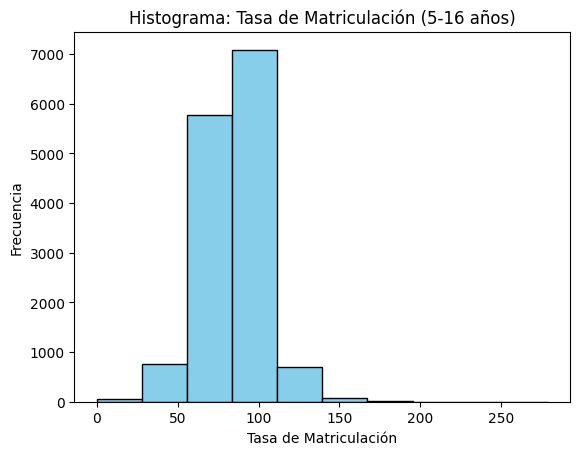

In [53]:
# 1. Histograma de tasa de matriculación
plt.hist(df_raw["tasa_matriculaci_n_5_16"], bins=10, color='skyblue', edgecolor='black')
plt.title("Histograma: Tasa de Matriculación (5-16 años)")
plt.xlabel("Tasa de Matriculación")
plt.ylabel("Frecuencia")
plt.show()

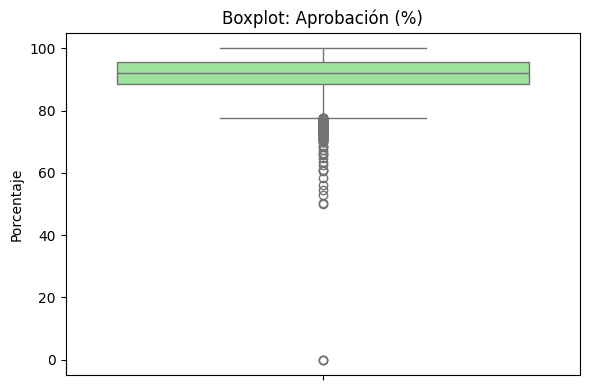

In [62]:
# Asegurarse de que la columna es numérica
df_raw["aprobaci_n"] = pd.to_numeric(df_raw["aprobaci_n"], errors="coerce")

# Boxplot limpio
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_raw, y="aprobaci_n", color="lightgreen")
plt.title("Boxplot: Aprobación (%)")
plt.ylabel("Porcentaje")
plt.tight_layout()
plt.show()

In [69]:
# DIMENSIÓN MUNICIPIO (solo con df_divipola)
dim_municipio = df_divipola[[
    "cod_mpio", "nom_mpio", "cod_dpto", "dpto", "tipo_municipio", "longitud", "latitud"
]].drop_duplicates()

dim_municipio = dim_municipio.rename(columns={
    "cod_mpio": "id_municipio",
    "nom_mpio": "municipio",
    "cod_dpto": "id_departamento",
    "dpto": "departamento"
})

dim_municipio.head(15)

,id_municipio,municipio,id_departamento,departamento,tipo_municipio,longitud,latitud
0,05001,MEDELLÍN,05,ANTIOQUIA,Municipio,"-75,581775","6,246631"
1,05002,ABEJORRAL,05,ANTIOQUIA,Municipio,"-75,428739","5,789315"
2,05004,ABRIAQUÍ,05,ANTIOQUIA,Municipio,"-76,064304","6,632282"
3,05021,ALEJANDRÍA,05,ANTIOQUIA,Municipio,"-75,141346","6,376061"
4,05030,AMAGÁ,05,ANTIOQUIA,Municipio,"-75,702188","6,038708"
5,05031,AMALFI,05,ANTIOQUIA,Municipio,"-75,077501","6,909655"
6,05034,ANDES,05,ANTIOQUIA,Municipio,"-75,878828","5,657194"
7,05036,ANGELÓPOLIS,05,ANTIOQUIA,Municipio,"-75,711389","6,109719"
8,05038,ANGOSTURA,05,ANTIOQUIA,Municipio,"-75,335116","6,885175"
9,05040,ANORÍ,05,ANTIOQUIA,Municipio,"-75,148355","7,074703"


In [73]:
# DIMENSIÓN DEPARTAMENTO
dim_departamento = df_raw[[
    "c_digo_departamento", "departamento"
]].drop_duplicates().rename(columns={
    "c_digo_departamento": "id_departamento"
})

dim_departamento.head(15)

,id_departamento,departamento
0,05,Antioquia
1,95,Guaviare
3,97,Vaupés
9,99,Vichada
14,94,Guainía
21,91,Amazonas
32,88,"Archipiélago de San Andrés, Providencia y Sant..."
34,86,Putumayo
47,85,Casanare
66,81,Arauca


In [72]:
# DIMENSIÓN TIEMPO
dim_tiempo = df_raw[["a_o"]].drop_duplicates().rename(columns={
    "a_o": "anio"
}).sort_values(by="anio")

dim_tiempo.head(15)


,anio
13460,2011
12338,2012
11216,2013
10094,2014
8972,2015
7850,2016
6728,2017
5606,2018
4484,2019
3363,2020


In [74]:
# DIMENSIÓN ETC
dim_etc = df_raw[["c_digo_etc", "etc"]].drop_duplicates().rename(columns={
    "c_digo_etc": "id_etc"
})

dim_etc.head(15)

,id_etc,etc
0,3758,Antioquia (ETC)
1,3830,Guaviare (ETC)
3,3831,Vaupés (ETC)
9,3832,Vichada (ETC)
14,3829,Guainía (ETC)
21,3828,Amazonas (ETC)
32,3827,"Archipiélago de San Andrés, Providencia y Sant..."
34,3826,Putumayo (ETC)
47,3825,Casanare (ETC)
65,4841,Yopal


In [88]:
conn.execute("DROP TABLE IF EXISTS dim_departamento;")

conn.execute("""
CREATE TABLE dim_departamento AS
SELECT DISTINCT
    c_digo_departamento AS id_departamento,
    departamento
FROM raw_educacion;
""")
dim_departamento

,id_departamento,departamento
0,05,Antioquia
1,95,Guaviare
3,97,Vaupés
9,99,Vichada
14,94,Guainía
21,91,Amazonas
32,88,"Archipiélago de San Andrés, Providencia y Sant..."
34,86,Putumayo
47,85,Casanare
66,81,Arauca


In [89]:
# Subimos el DataFrame df_divipola como tabla SQL llamada 'divipola'
df_divipola.to_sql("divipola", conn, if_exists="replace", index=False)


conn.execute("DROP TABLE IF EXISTS dim_municipio;")

conn.execute("""
CREATE TABLE dim_municipio AS
SELECT DISTINCT
    cod_mpio AS id_municipio,
    nom_mpio AS municipio,
    cod_dpto AS id_departamento,
    dpto AS departamento,
    tipo_municipio,
    longitud,
    latitud
FROM divipola;
""")

dim_municipio


,id_municipio,municipio,id_departamento,departamento,tipo_municipio,longitud,latitud
0,05001,MEDELLÍN,05,ANTIOQUIA,Municipio,"-75,581775","6,246631"
1,05002,ABEJORRAL,05,ANTIOQUIA,Municipio,"-75,428739","5,789315"
2,05004,ABRIAQUÍ,05,ANTIOQUIA,Municipio,"-76,064304","6,632282"
3,05021,ALEJANDRÍA,05,ANTIOQUIA,Municipio,"-75,141346","6,376061"
4,05030,AMAGÁ,05,ANTIOQUIA,Municipio,"-75,702188","6,038708"
...,...,...,...,...,...,...,...
1117,97889,YAVARATÉ,97,VAUPÉS,Área no municipalizada,"-69,203337","0,609142"
1118,99001,PUERTO CARREÑO,99,VICHADA,Municipio,"-67,487095","6,186636"
1119,99524,LA PRIMAVERA,99,VICHADA,Municipio,"-70,410515","5,486309"
1120,99624,SANTA ROSALÍA,99,VICHADA,Municipio,"-70,859499","5,136393"


In [90]:
conn.execute("DROP TABLE IF EXISTS dim_tiempo;")

conn.execute("""
CREATE TABLE dim_tiempo AS
SELECT DISTINCT
    a_o AS anio
FROM raw_educacion
ORDER BY anio;
""")

dim_tiempo

,anio
13460,2011
12338,2012
11216,2013
10094,2014
8972,2015
7850,2016
6728,2017
5606,2018
4484,2019
3363,2020


In [91]:
conn.execute("DROP TABLE IF EXISTS dim_etc;")

conn.execute("""
CREATE TABLE dim_etc AS
SELECT DISTINCT
    c_digo_etc AS id_etc,
    etc
FROM raw_educacion;
""")

dim_etc

,id_etc,etc
0,3758,Antioquia (ETC)
1,3830,Guaviare (ETC)
3,3831,Vaupés (ETC)
9,3832,Vichada (ETC)
14,3829,Guainía (ETC)
...,...,...
3344,3.76,Bello
3350,7.692,Apartado
3362,3.759,Medellín
3388,3827,Archipiélago de San Andrés. Providencia y Sant...


In [87]:
import sqlite3

# Subimos el df_raw como una tabla SQL temporal
df_raw.to_sql("raw_educacion", conn, if_exists="replace", index=False)

# Creamos la tabla de hechos fact_educacion usando SQL
query_hechos = """
CREATE TABLE IF NOT EXISTS fact_educacion AS
SELECT
    CAST(c_digo_municipio AS TEXT) AS id_municipio,
    CAST(c_digo_departamento AS TEXT) AS id_departamento,
    CAST(a_o AS INTEGER) AS anio,
    CAST(c_digo_etc AS TEXT) AS id_etc,

    CAST(poblaci_n_5_16 AS FLOAT) AS poblacion_5_16,
    CAST(tasa_matriculaci_n_5_16 AS FLOAT) AS tasa_matriculacion_5_16,
    CAST(cobertura_neta AS FLOAT) AS cobertura_neta,
    CAST(cobertura_neta_transici_n AS FLOAT) AS cobertura_neta_transicion,
    CAST(cobertura_neta_primaria AS FLOAT) AS cobertura_neta_primaria,
    CAST(cobertura_neta_secundaria AS FLOAT) AS cobertura_neta_secundaria,
    CAST(cobertura_neta_media AS FLOAT) AS cobertura_neta_media,
    
    CAST(deserci_n AS FLOAT) AS desercion,
    CAST(deserci_n_transici_n AS FLOAT) AS desercion_transicion,
    CAST(deserci_n_primaria AS FLOAT) AS desercion_primaria,
    CAST(deserci_n_secundaria AS FLOAT) AS desercion_secundaria,
    CAST(deserci_n_media AS FLOAT) AS desercion_media,
    
    CAST(aprobaci_n AS FLOAT) AS aprobacion,
    CAST(aprobaci_n_transici_n AS FLOAT) AS aprobacion_transicion,
    CAST(aprobaci_n_primaria AS FLOAT) AS aprobacion_primaria,
    CAST(aprobaci_n_secundaria AS FLOAT) AS aprobacion_secundaria,
    CAST(aprobaci_n_media AS FLOAT) AS aprobacion_media,
    
    CAST(reprobaci_n_transici_n AS FLOAT) AS reprobacion_transicion,
    CAST(reprobaci_n_primaria AS FLOAT) AS reprobacion_primaria,
    CAST(reprobaci_n_secundaria AS FLOAT) AS reprobacion_secundaria,
    CAST(reprobaci_n_media AS FLOAT) AS reprobacion_media,

    CAST(repitencia AS FLOAT) AS repitencia_total,
    CAST(repitencia_transici_n AS FLOAT) AS repitencia_transicion,
    CAST(repitencia_primaria AS FLOAT) AS repitencia_primaria,
    CAST(repitencia_secundaria AS FLOAT) AS repitencia_secundaria,
    CAST(repitencia_media AS FLOAT) AS repitencia_media,

    CAST(tama_o_promedio_de_grupo AS FLOAT) AS tamano_promedio_grupo,
    CAST(sedes_conectadas_a_internet AS FLOAT) AS sedes_conectadas

FROM raw_educacion;
"""

# Ejecutamos la creación
conn.execute("DROP TABLE IF EXISTS fact_educacion;")
conn.execute(query_hechos)
conn.commit()

# Verificamos los primeros datos
df_fact = pd.read_sql("SELECT * FROM fact_educacion LIMIT 5", conn)
df_fact.head()


,id_municipio,id_departamento,anio,id_etc,poblacion_5_16,tasa_matriculacion_5_16,cobertura_neta,cobertura_neta_transicion,cobertura_neta_primaria,cobertura_neta_secundaria,...,reprobacion_primaria,reprobacion_secundaria,reprobacion_media,repitencia_total,repitencia_transicion,repitencia_primaria,repitencia_secundaria,repitencia_media,tamano_promedio_grupo,sedes_conectadas
0,05004,05,2023,3758,503.0,62.62,62.62,44.19,63.33,51.53,...,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04,None,None
1,95025,95,2023,3830,4438.0,53.27,53.27,33.91,48.89,44.90,...,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,None,None
2,95200,95,2023,3830,2014.0,32.52,32.52,17.58,25.33,26.43,...,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,None,None
3,97001,97,2023,3831,10986.0,59.57,59.57,42.76,55.95,43.51,...,4.04,8.33,4.60,16.18,7.75,21.04,13.84,7.18,None,None
4,97161,97,2023,3831,1228.0,51.30,51.30,76.32,52.29,33.71,...,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,None,None
